In [318]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, RocCurveDisplay
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing import sequence
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score    
from tensorflow.python.keras import models, layers, optimizers   
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, SpatialDropout1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import tensorflow as tf
import pickle
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

In [319]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [320]:
df = pd.read_csv("/content/drive/MyDrive/cleaned_data.csv",encoding="latin1")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [321]:
df = df.dropna(how='any',axis=0) 

In [322]:
df["verified_purchase"].value_counts()

False    900
True     812
Name: verified_purchase, dtype: int64

In [323]:
X = df['review_text'] #input var
y = df['verified_purchase'] #target var

In [324]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review_text'], df['verified_purchase'],test_size=0.4, random_state=123)

entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685


In [325]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('Vocabulary:', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)

Vocabulary: {'start': 1649, 'cerav': 274, 'facial': 620, 'lotion': 1015, 'month': 1111, 'ago': 35, 'sinc': 1551, 'constant': 369, 'breakout': 208, 'norm': 1165, 'want': 1902, 'love': 1016, 'persist': 1256, 'recent': 1385, 'decid': 437, 'pick': 1268, 'simpl': 1548, 'best': 155, 'thing': 1770, 'day': 429, 'current': 417, 'spot': 1634, 'begun': 145, 'clear': 319, 'overal': 1210, 'look': 1009, 'face': 619, 'calmer': 246, 'goe': 757, 'fanci': 635, 'long': 1006, 'sciencey': 1489, 'alway': 56, 'come': 339, 'gentl': 734, 'like': 986, 'great': 780, 'price': 1322, 'buy': 240, 'item': 926, 'state': 1651, 'deliv': 459, 'time': 1787, 'good': 762, 'expect': 600, 'condition': 362, 'howev': 861, 'bottl': 198, 'lid': 978, 'terribl': 1758, 'difficult': 487, 'pour': 1310, 'tini': 1790, 'measur': 1066, 'slipperi': 1567, 'hold': 844, 'caus': 268, 'aggrav': 34, 'brilliant': 216, 'valu': 1872, 'money': 1110, 'vaselin': 1877, 'necess': 1144, 'household': 860, 'medicin': 1069, 'cabinet': 243, 'lip': 994, 'elbo

### Multinomial Naive Bayes model

In [326]:
#IMPLEMENTING AND RUNNNING MNB MODEL - COUNT
mnb1 = MultinomialNB()
mnb1.fit(train_c, y_train)
prediction = mnb1.predict(test_c)

In [327]:
#EVALUATION
mnb_a1 = accuracy_score(y_test, prediction)*100
mnb_p1 = precision_score(y_test, prediction)* 100
mnb_r1 = recall_score(y_test, prediction)*100
mnb_f11 = f1_score(y_test, prediction)*100

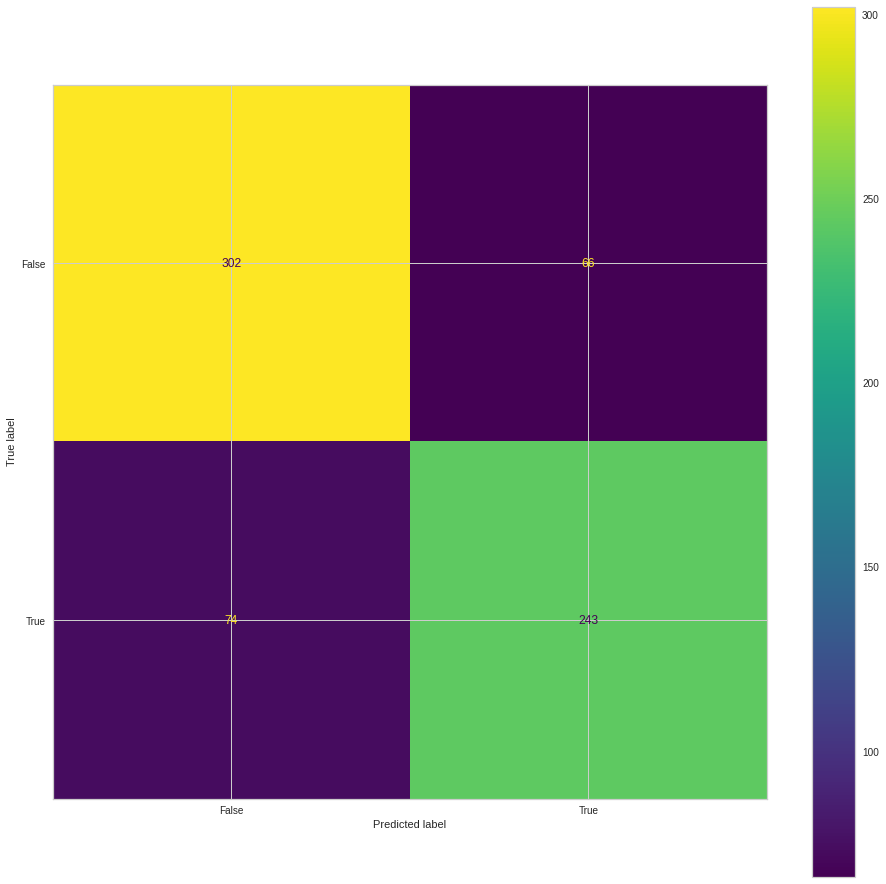

In [328]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb1.classes_) 
display.plot() 

The area under curve 0.7936068440543136


Text(0.5, 1.0, 'ROC Curve')

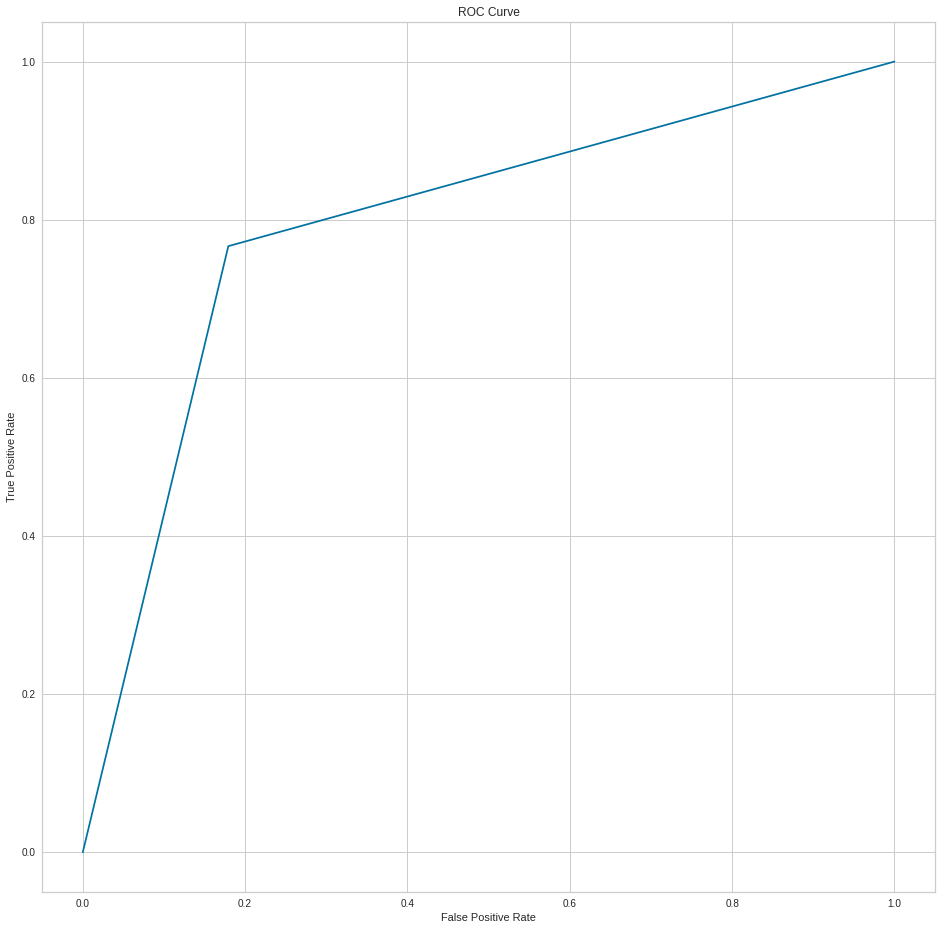

In [329]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

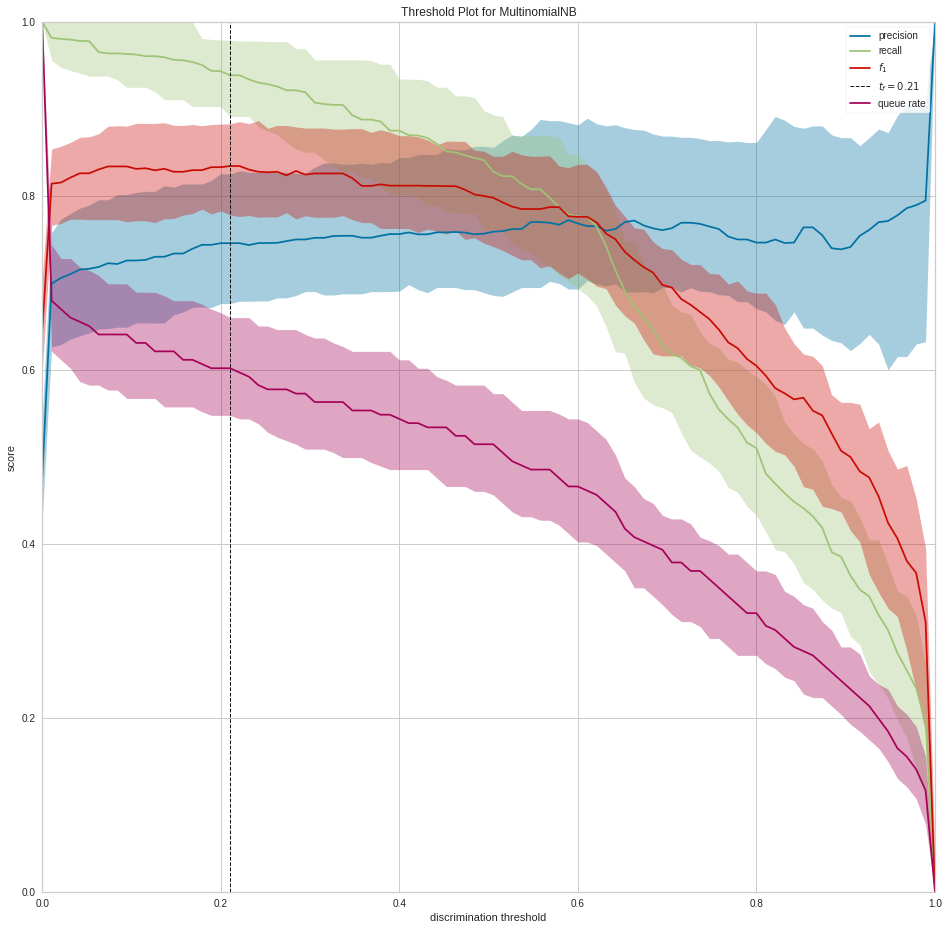

<Axes: title={'center': 'Threshold Plot for MultinomialNB'}, xlabel='discrimination threshold', ylabel='score'>

In [330]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(mnb1)

visualizer.fit(train_c, y_train)        
visualizer.show()         

### Support Vector Machine model

In [331]:
#IMPLEMENTING AND RUNNNING SVM MODEL - COUNT
svm1 = SVC(kernel='linear')
svm1.fit(train_c, y_train)
prediction = svm1.predict(test_c)

In [332]:
#EVALUATION
svm_a1 = accuracy_score(y_test, prediction)*100
svm_p1 = precision_score(y_test, prediction)* 100
svm_r1 = recall_score(y_test, prediction)*100
svm_f11 = f1_score(y_test, prediction)*100

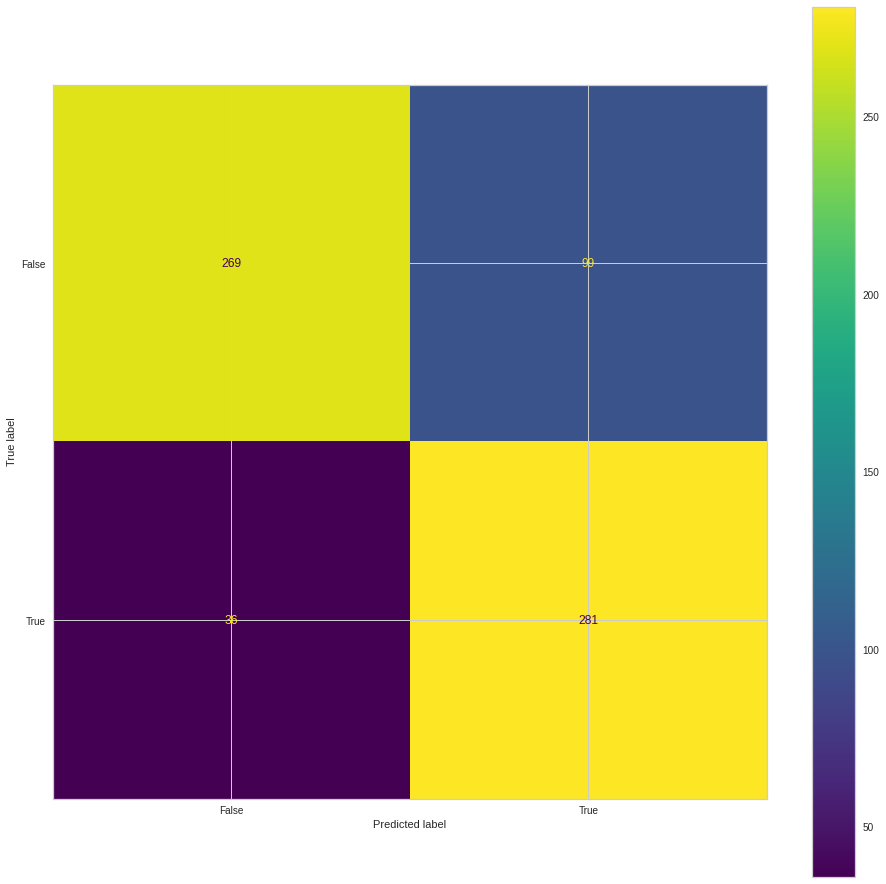

In [333]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm1.classes_) 
display.plot() 

The area under curve 0.8087067960499246


Text(0.5, 1.0, 'ROC Curve')

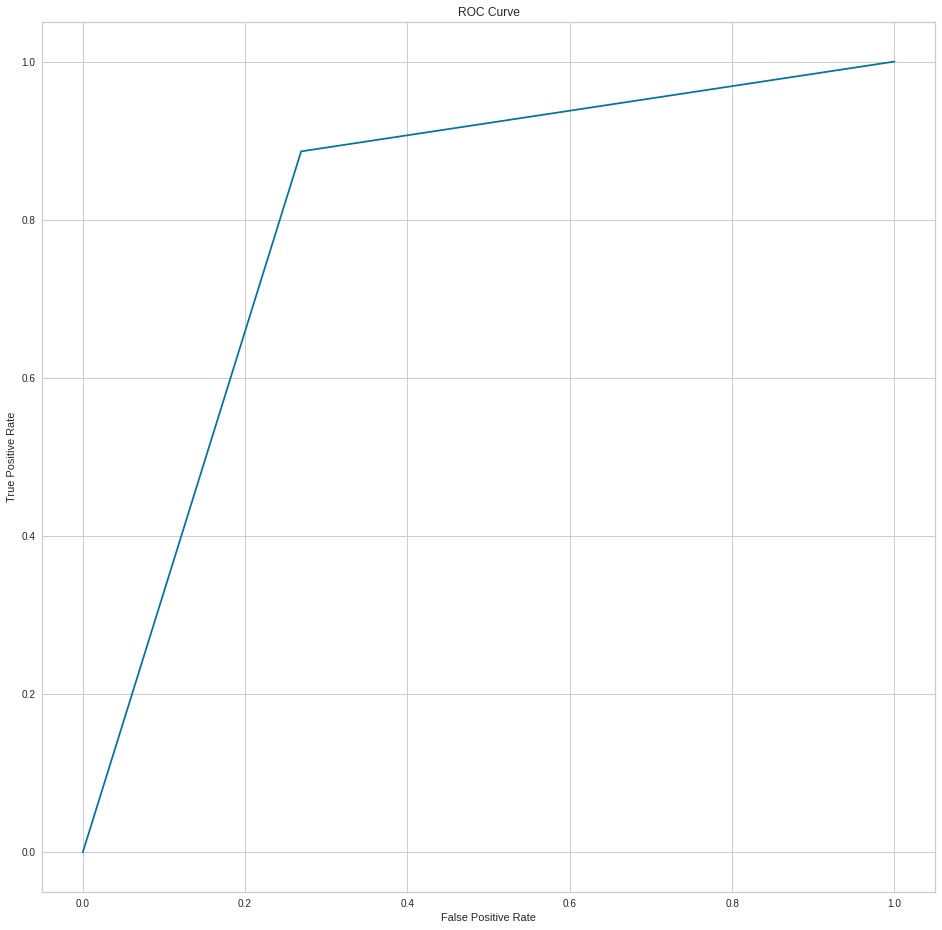

In [334]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

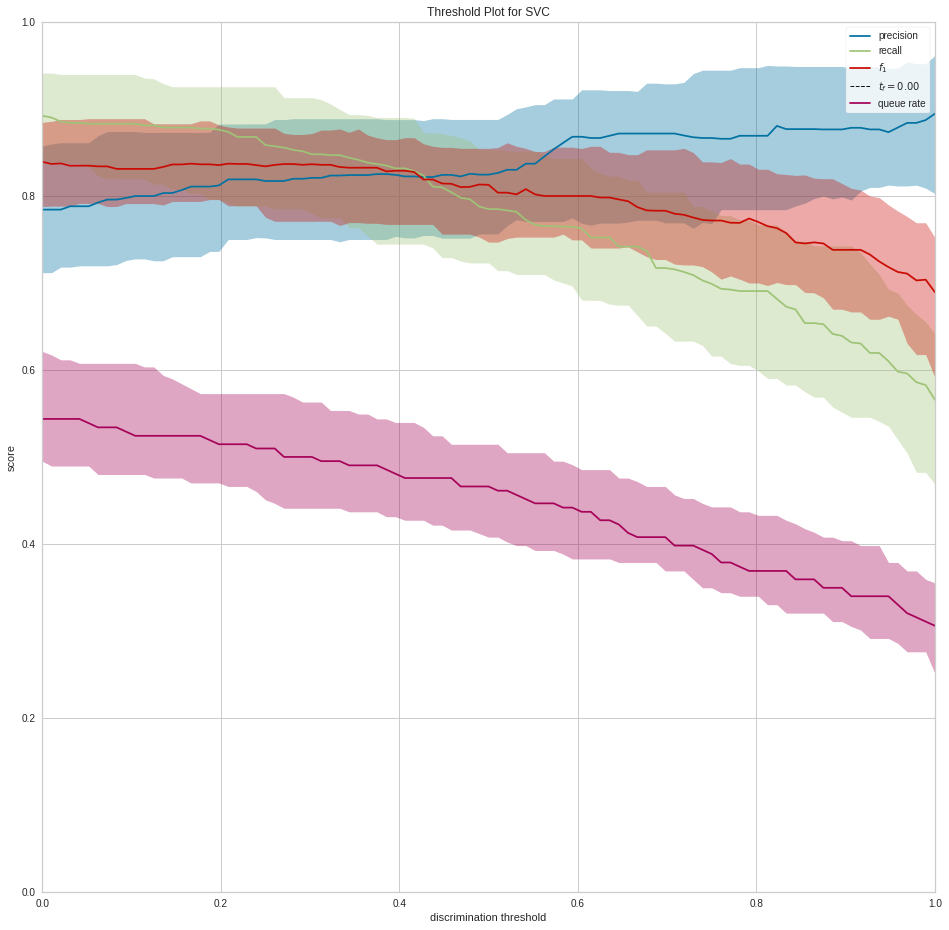

<Axes: title={'center': 'Threshold Plot for SVC'}, xlabel='discrimination threshold', ylabel='score'>

In [335]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(svm1)

visualizer.fit(train_c, y_train)        
visualizer.show()           

### Logistic Regression model

In [336]:
#IMPLEMENTING AND RUNNNING LR MODEL - COUNT
lr1 = LogisticRegression()
lr1.fit(train_c, y_train)
prediction = lr1.predict(test_c)

In [337]:
#EVALUATION
lr_a1 = accuracy_score(y_test, prediction)*100
lr_p1 = precision_score(y_test, prediction)* 100
lr_r1 = recall_score(y_test, prediction)*100
lr_f11 = f1_score(y_test, prediction)*100

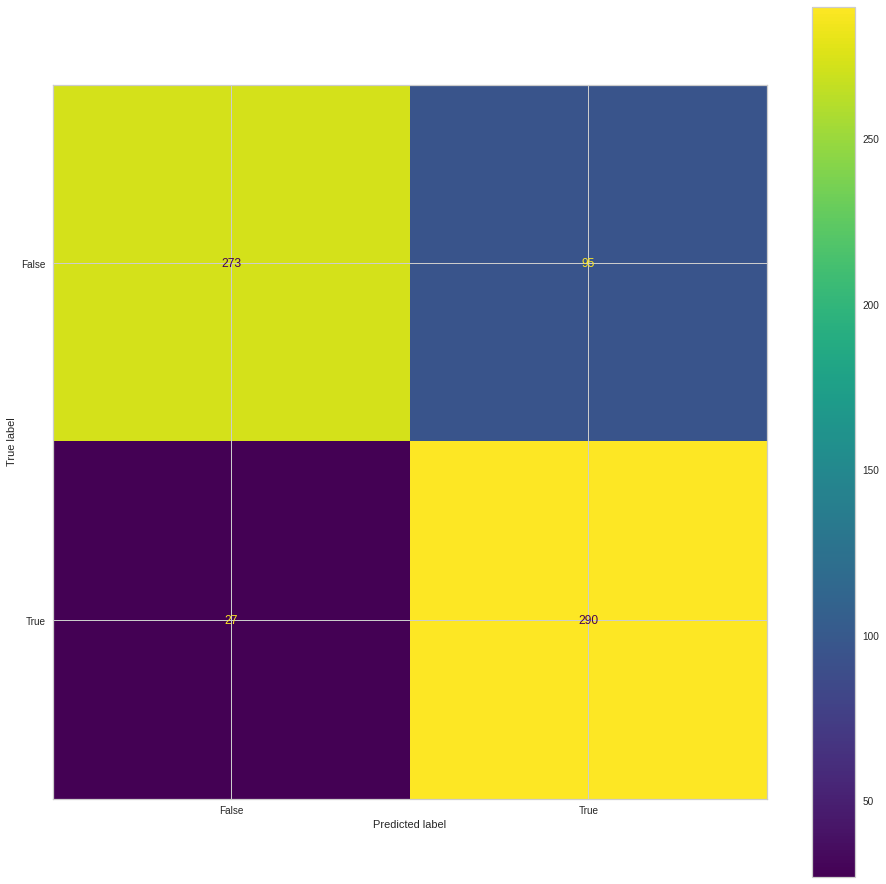

In [338]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.8283371622548348


Text(0.5, 1.0, 'ROC Curve')

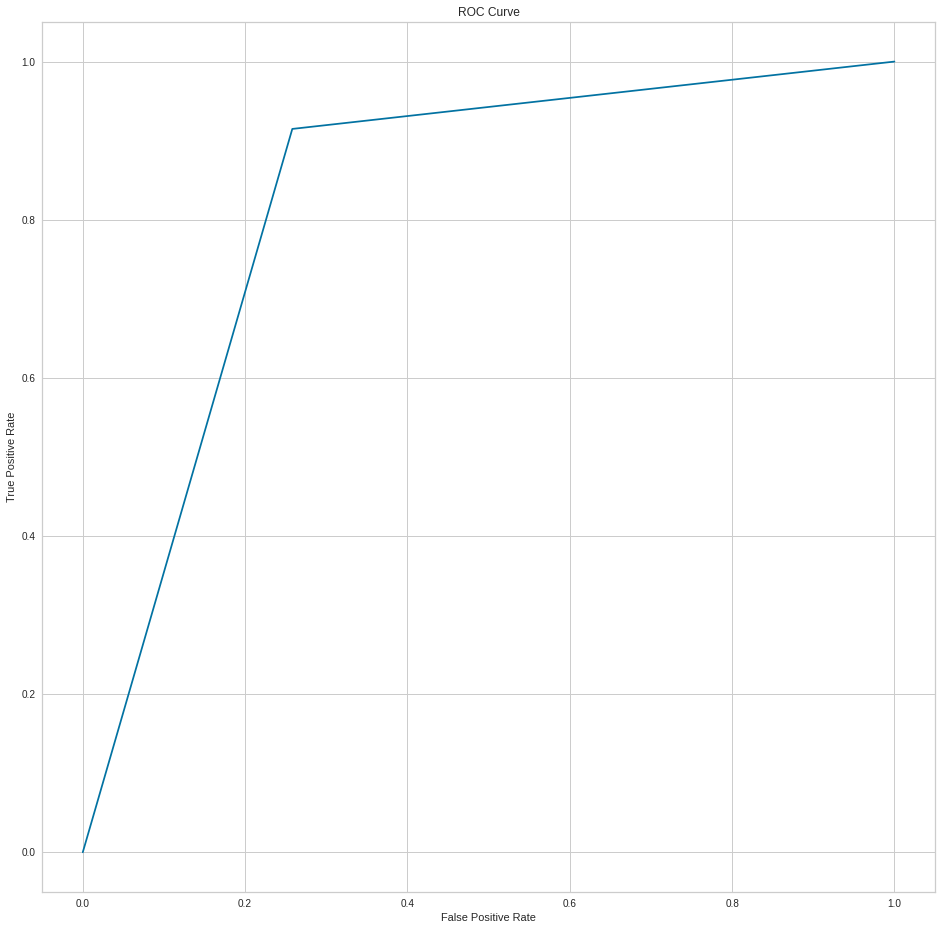

In [339]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

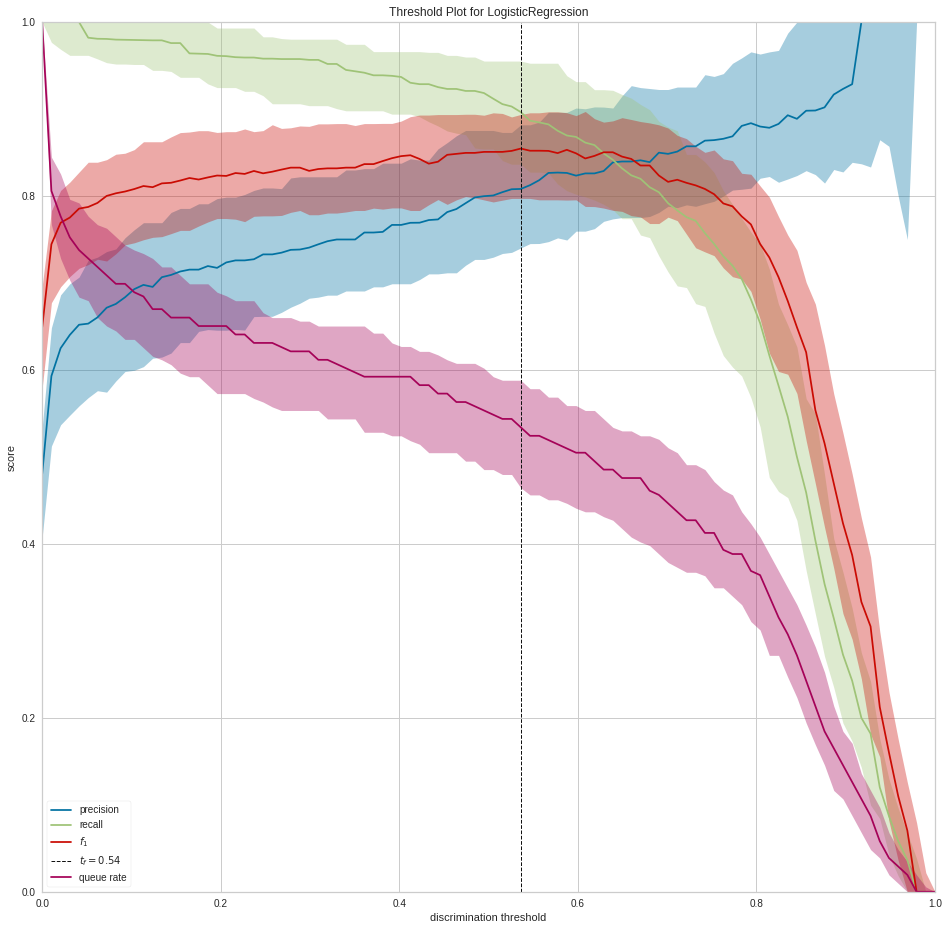

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [340]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(lr1)

visualizer.fit(train_c, y_train)        
visualizer.show()           

### **Decision Tree**

In [341]:
dt1=DecisionTreeClassifier(max_depth=15)
dt1.fit(train_c,y_train)
prediction=dt1.predict(test_c)

In [342]:
#EVALUATION
dt_a1 = accuracy_score(y_test, prediction)*100
dt_p1 = precision_score(y_test, prediction)* 100
dt_r1 = recall_score(y_test, prediction)*100
dt_f11 = f1_score(y_test, prediction)*100
print(dt_a1)
print(dt_p1)

77.51824817518248
70.84398976982096


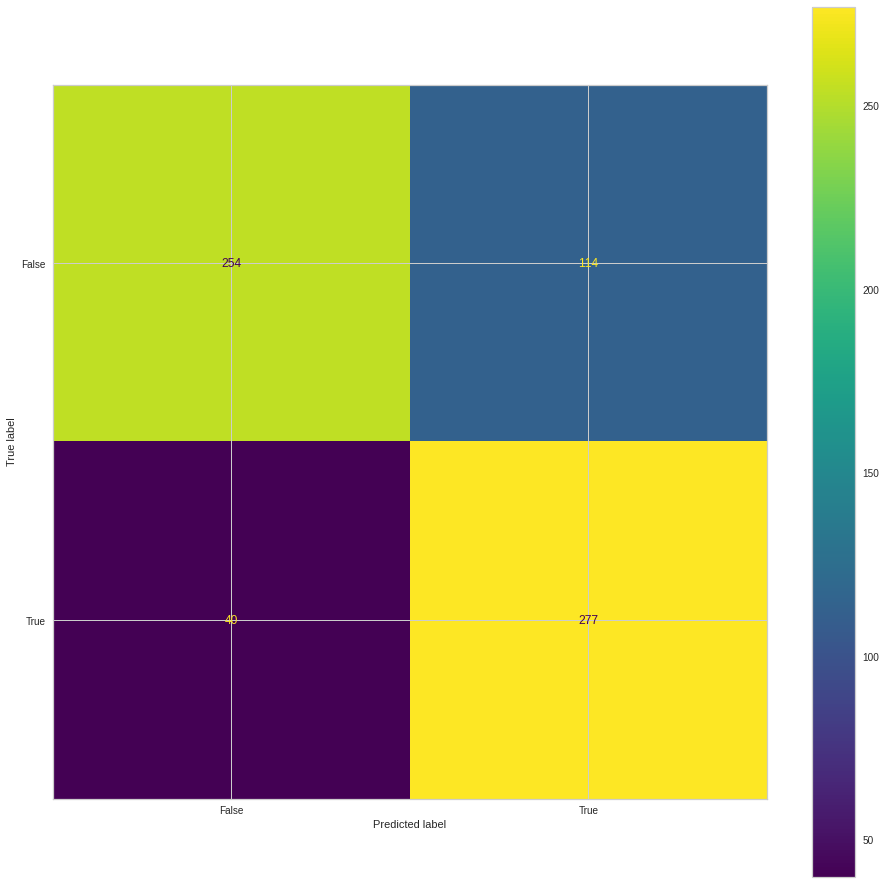

In [343]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=dt1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.7820172130023316


Text(0.5, 1.0, 'ROC Curve')

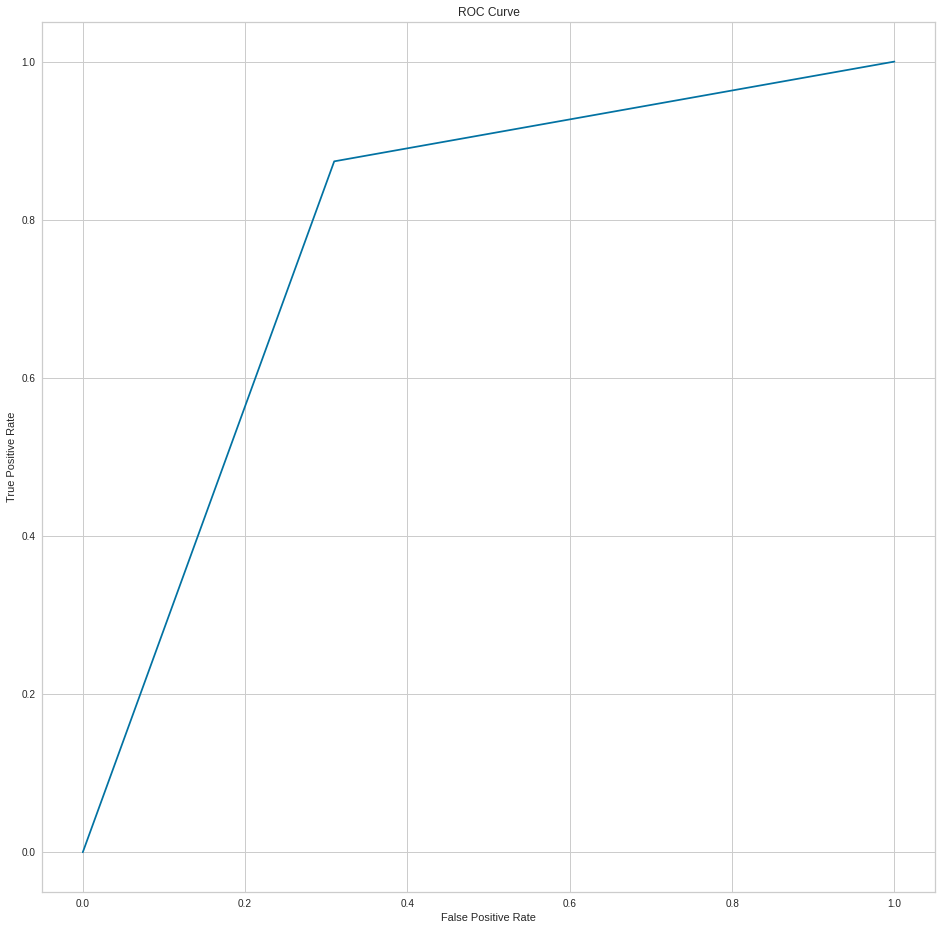

In [344]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

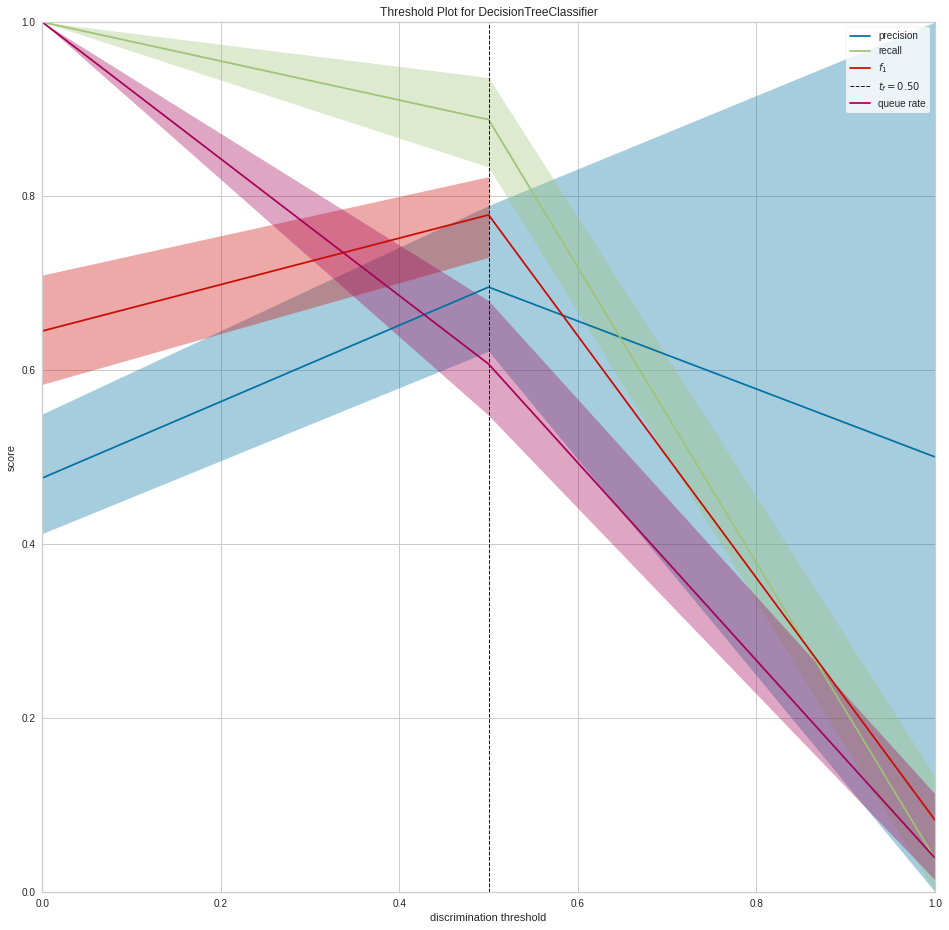

<Axes: title={'center': 'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [345]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(dt1)

visualizer.fit(train_c, y_train)        
visualizer.show()           

### **Random Forest**

In [346]:
rn1=RandomForestClassifier(bootstrap=True,max_depth=15,max_features=5, n_estimators= 100)
rn1.fit(train_c,y_train)
pred_y=rn1.predict(test_c)

In [347]:
#EVALUATION
rn_a1 = accuracy_score(y_test, prediction)*100
rn_p1 = precision_score(y_test, prediction)* 100
rn_r1 = recall_score(y_test, prediction)*100
rn_f11 = f1_score(y_test, prediction)*100
print(rn_a1)
print(rn_p1)

77.51824817518248
70.84398976982096


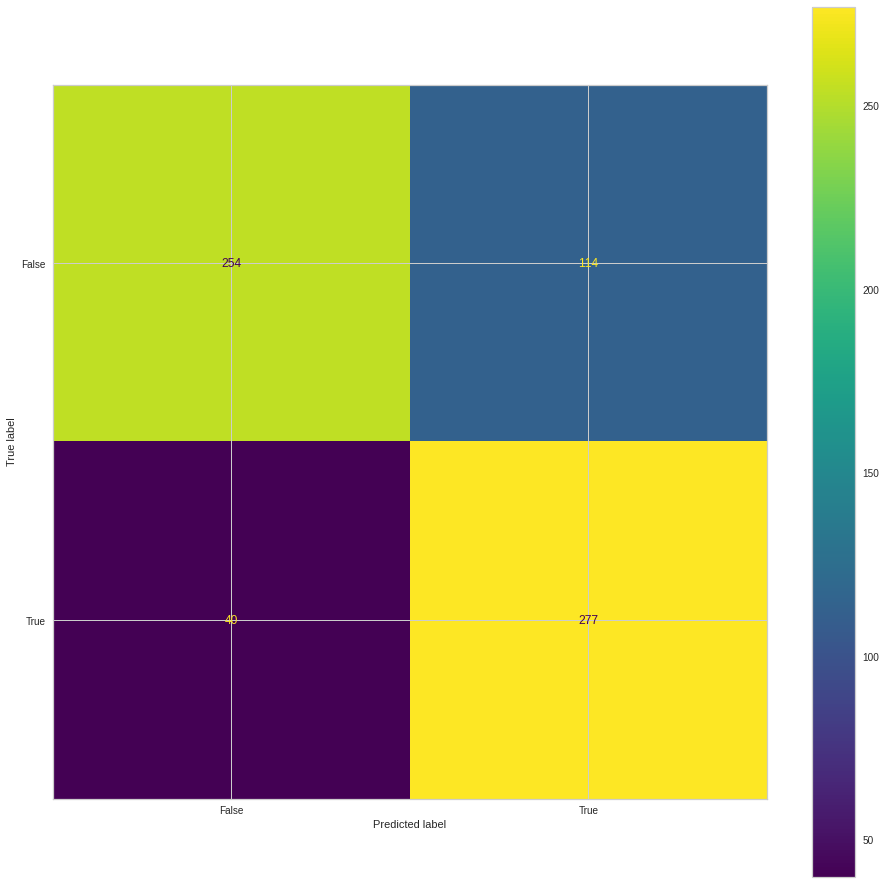

In [348]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=dt1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.7820172130023316


Text(0.5, 1.0, 'ROC Curve')

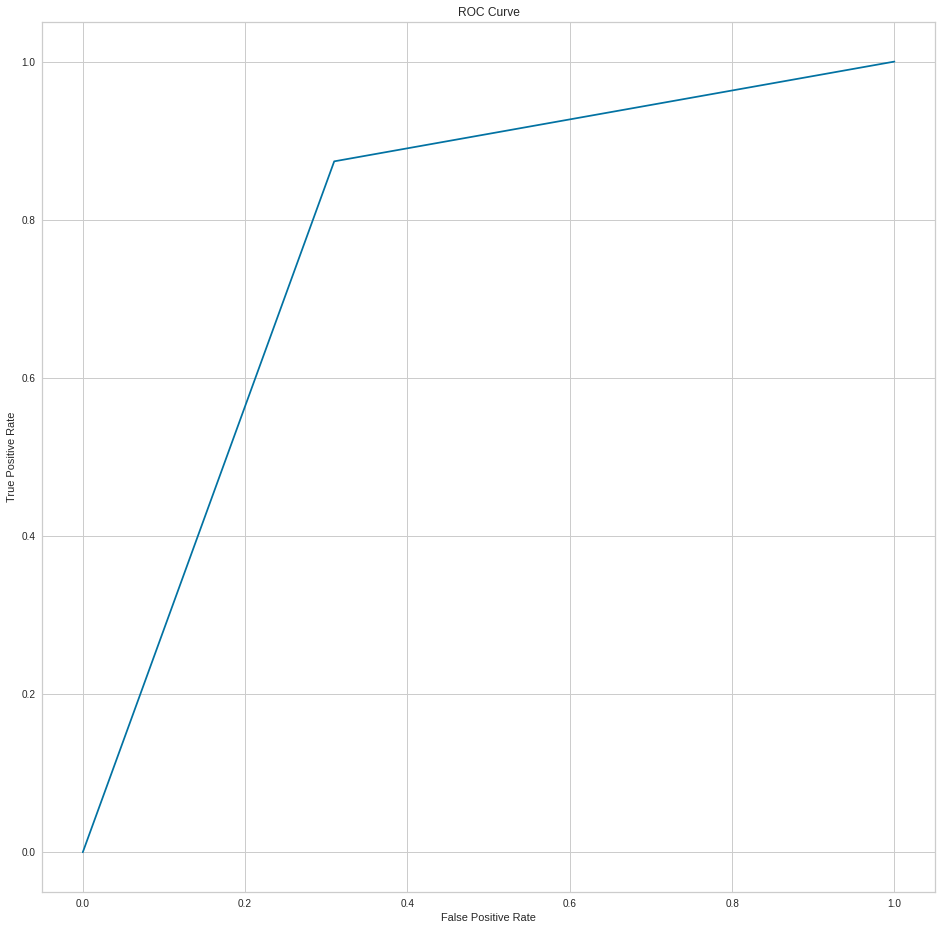

In [349]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

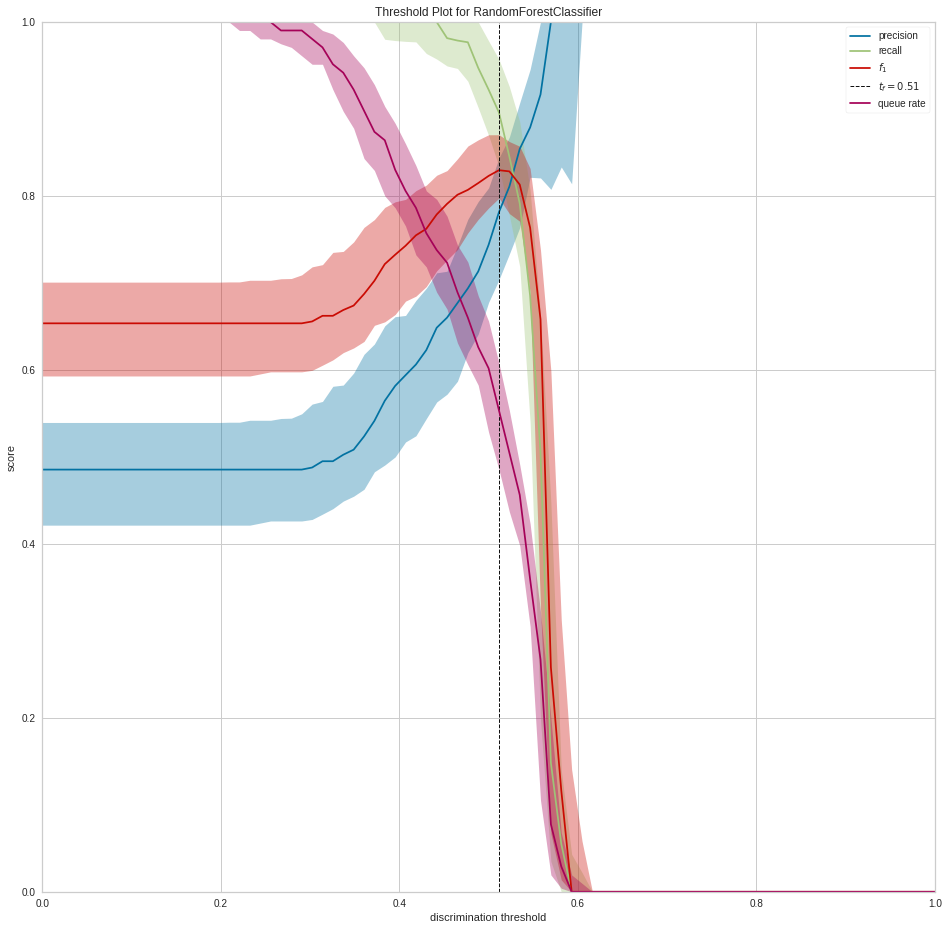

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [350]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(rn1)

visualizer.fit(train_c, y_train)        
visualizer.show()         

In [351]:
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)


Vocabulary: 
 {'start': 1649, 'cerav': 274, 'facial': 620, 'lotion': 1015, 'month': 1111, 'ago': 35, 'sinc': 1551, 'constant': 369, 'breakout': 208, 'norm': 1165, 'want': 1902, 'love': 1016, 'persist': 1256, 'recent': 1385, 'decid': 437, 'pick': 1268, 'simpl': 1548, 'best': 155, 'thing': 1770, 'day': 429, 'current': 417, 'spot': 1634, 'begun': 145, 'clear': 319, 'overal': 1210, 'look': 1009, 'face': 619, 'calmer': 246, 'goe': 757, 'fanci': 635, 'long': 1006, 'sciencey': 1489, 'alway': 56, 'come': 339, 'gentl': 734, 'like': 986, 'great': 780, 'price': 1322, 'buy': 240, 'item': 926, 'state': 1651, 'deliv': 459, 'time': 1787, 'good': 762, 'expect': 600, 'condition': 362, 'howev': 861, 'bottl': 198, 'lid': 978, 'terribl': 1758, 'difficult': 487, 'pour': 1310, 'tini': 1790, 'measur': 1066, 'slipperi': 1567, 'hold': 844, 'caus': 268, 'aggrav': 34, 'brilliant': 216, 'valu': 1872, 'money': 1110, 'vaselin': 1877, 'necess': 1144, 'household': 860, 'medicin': 1069, 'cabinet': 243, 'lip': 994, 'e

### Multinomial Naive Bayes model

In [352]:
#IMPLEMENTING AND RUNNING MNB MODEL - TFIDF
mnb2 = MultinomialNB()
mnb2.fit(train_tf, y_train)
prediction = mnb2.predict(test_tf)

In [353]:
#EVALUATION
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction)* 100
mnb_r2 = recall_score(y_test, prediction)*100

mnb_f12 = f1_score(y_test, prediction)*100

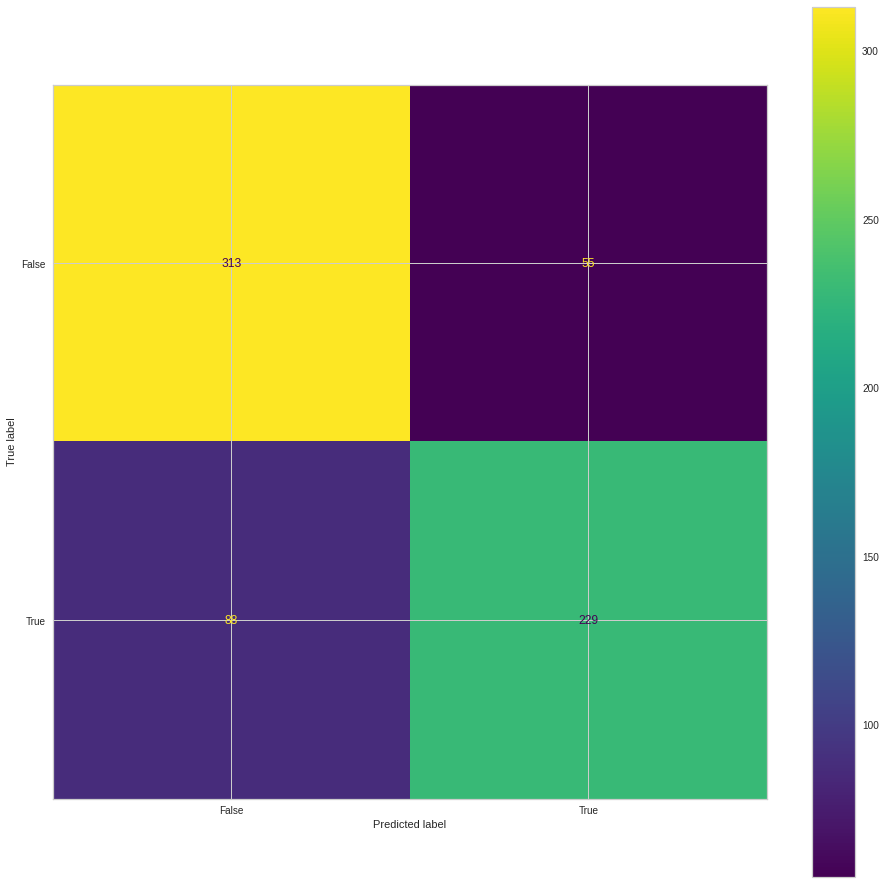

In [354]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb2.classes_) 
display.plot() 

The area under curve 0.7864704773007818


Text(0.5, 1.0, 'ROC Curve')

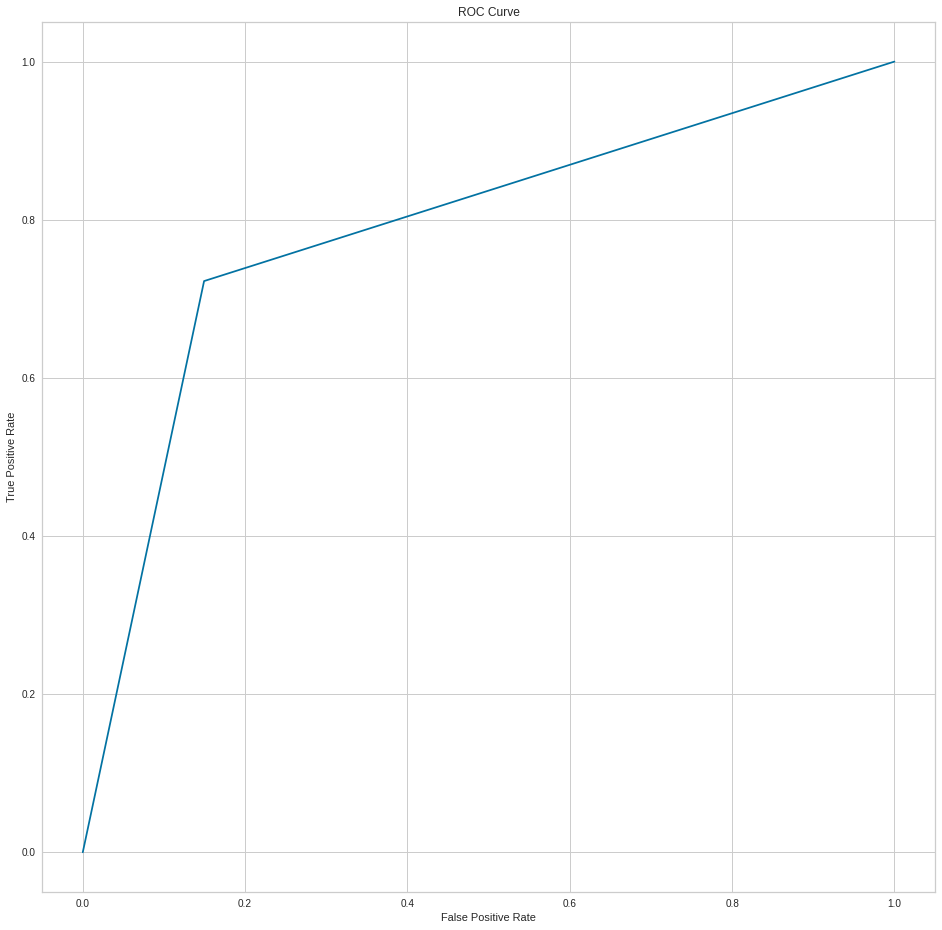

In [355]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

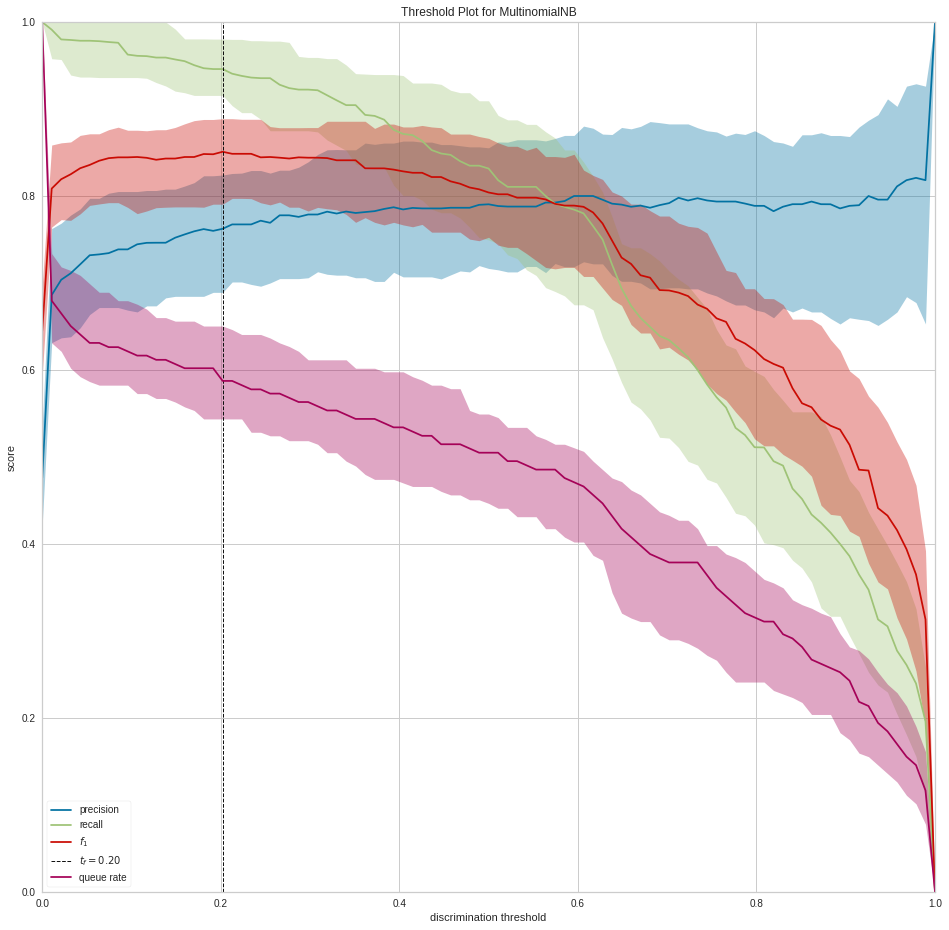

<Axes: title={'center': 'Threshold Plot for MultinomialNB'}, xlabel='discrimination threshold', ylabel='score'>

In [356]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(mnb2)

visualizer.fit(train_c, y_train)        
visualizer.show()         

### Support Vector Machine model

In [357]:
#IMPLEMENTING AND RUNNING SVM MODEL - TFIDF 
svm2 = SVC(kernel='linear')
svm2.fit(train_tf, y_train)
prediction = svm2.predict(test_tf)

In [358]:
#EVALUATION
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction)* 100
svm_r2 = recall_score(y_test, prediction)*100
svm_f12 = f1_score(y_test, prediction)*100

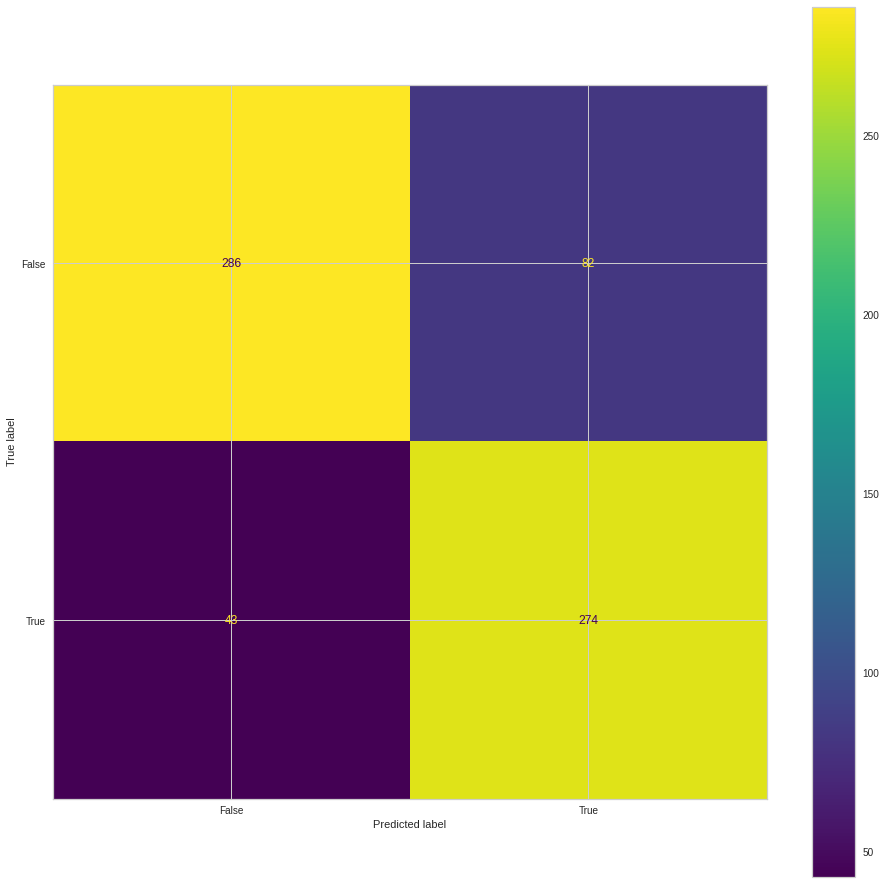

In [359]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_) 
display.plot() 

The area under curve 0.8207636126731587


Text(0.5, 1.0, 'ROC Curve')

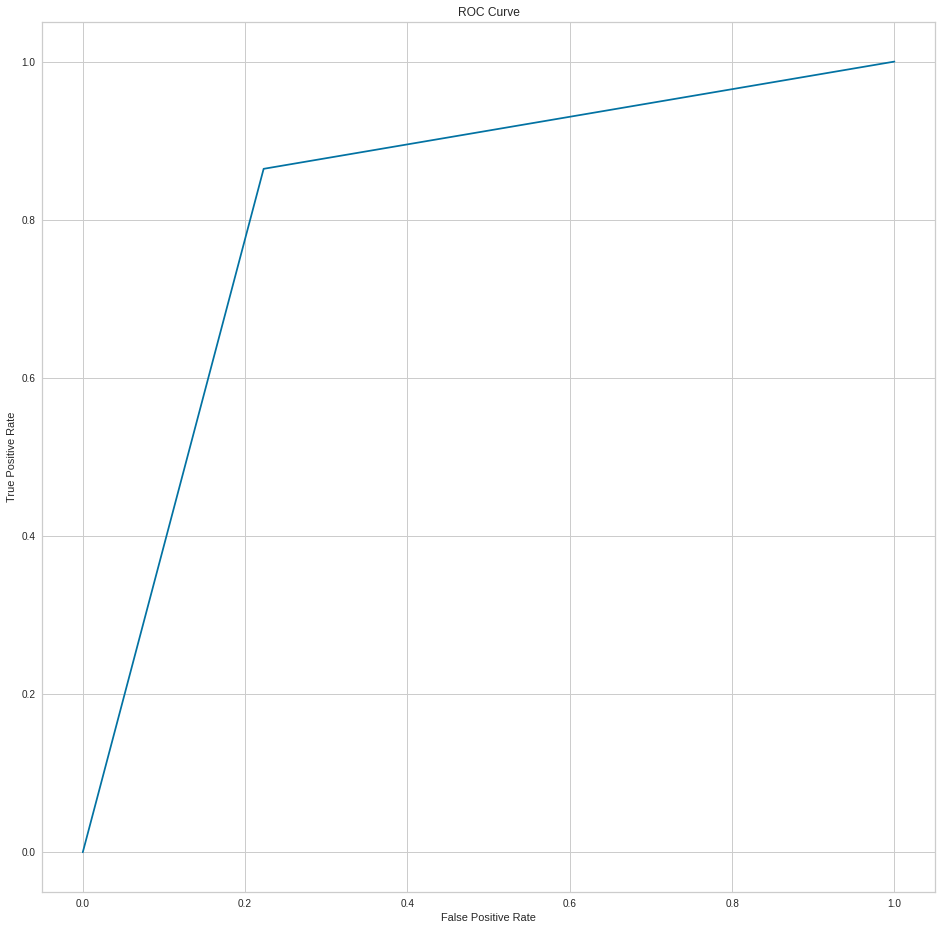

In [360]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

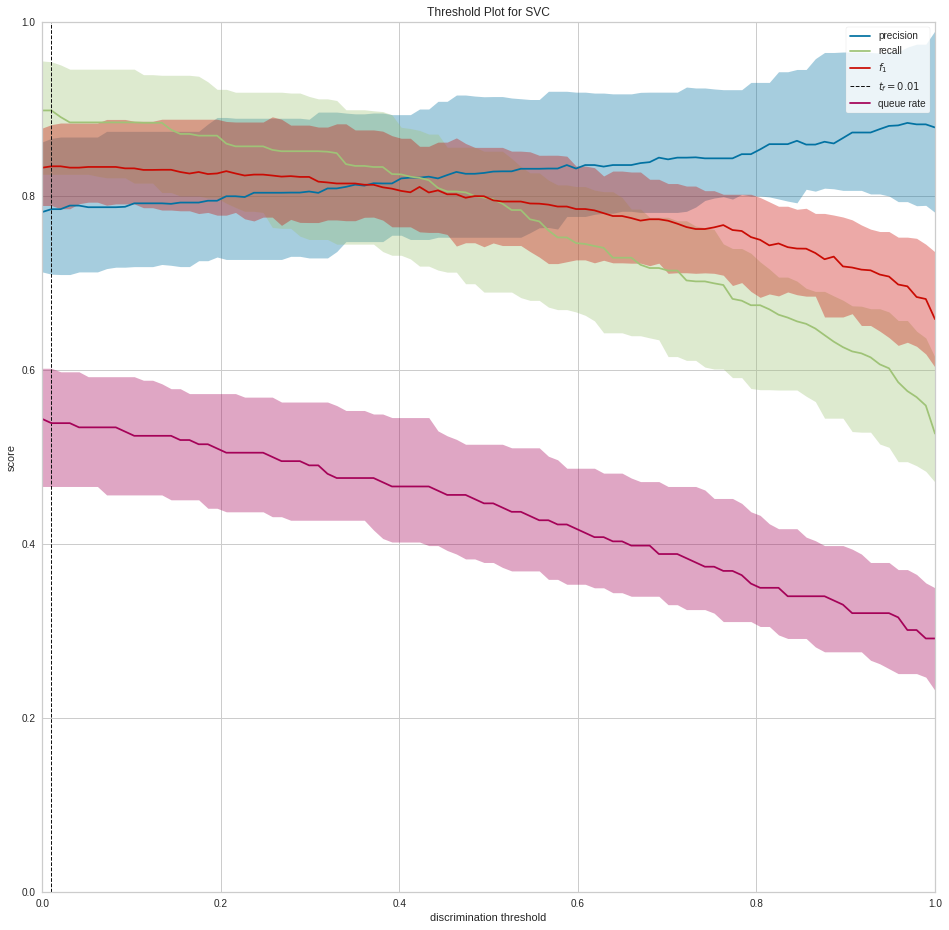

<Axes: title={'center': 'Threshold Plot for SVC'}, xlabel='discrimination threshold', ylabel='score'>

In [361]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(svm2)

visualizer.fit(train_c, y_train)        
visualizer.show() 

### Logistic Regression model

In [362]:
#IMPLEMENTATION AND RUNNING LR MODEL - TFIDF 
lr2 = LogisticRegression()
lr2.fit(train_tf, y_train)
prediction = lr2.predict(test_tf)

In [363]:
#EVALUATION
lr_a2 = accuracy_score(y_test, prediction)*100
lr_p2 = precision_score(y_test, prediction)* 100
lr_r2 = recall_score(y_test, prediction)*100
lr_f12 = f1_score(y_test, prediction)*100

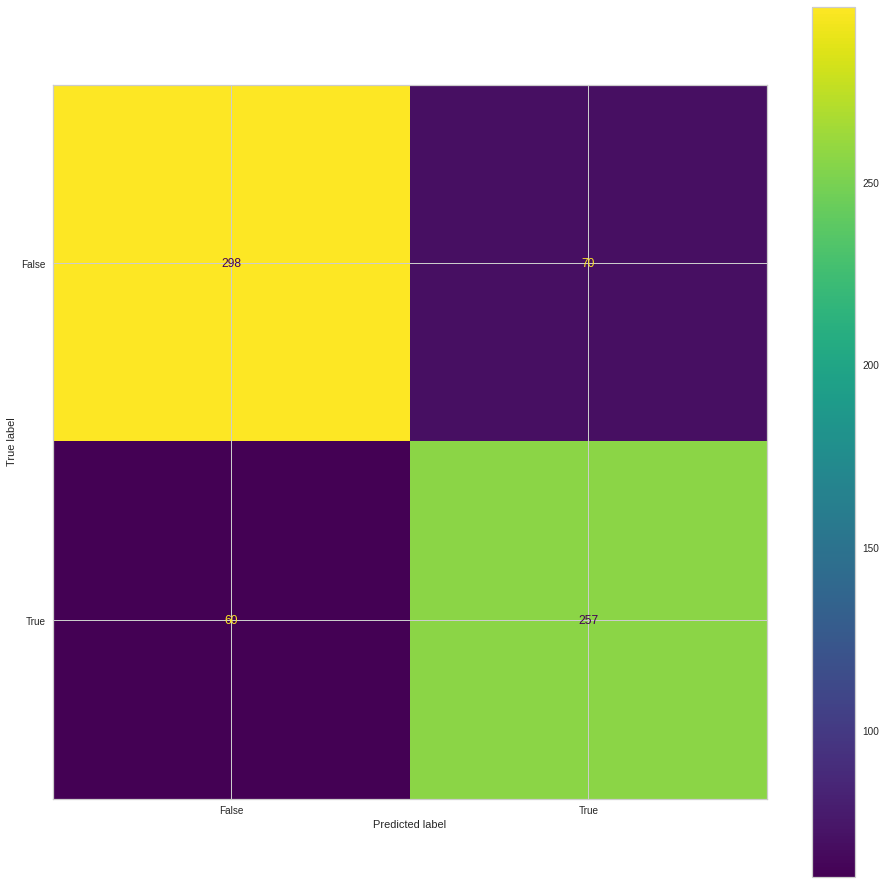

In [364]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr2.classes_) 
display.plot() 

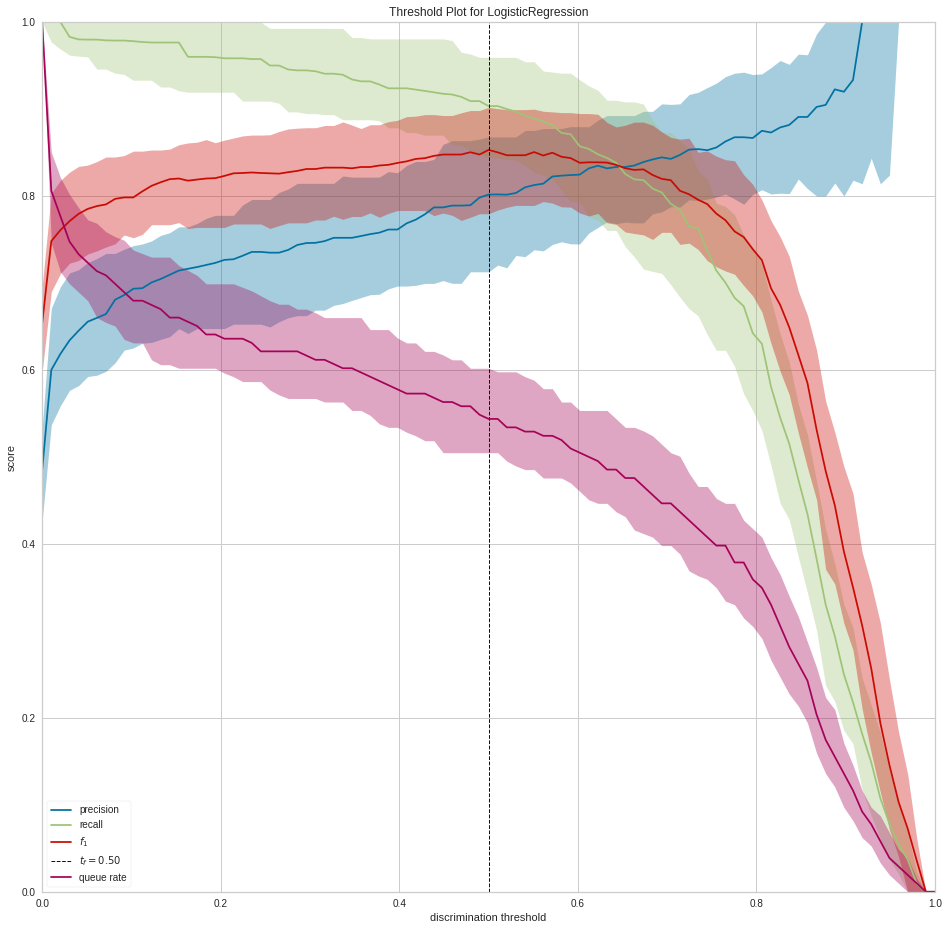

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [365]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(lr2)

visualizer.fit(train_c, y_train)        
visualizer.show() 

### **Decision Tree**

In [366]:
dt2=DecisionTreeClassifier(max_depth=15)
dt2.fit(train_c,y_train)
prediction=dt2.predict(test_c)

In [367]:
#EVALUATION
dt_a2 = accuracy_score(y_test, prediction)*100
dt_p2 = precision_score(y_test, prediction)* 100
dt_r2 = recall_score(y_test, prediction)*100
dt_f12 = f1_score(y_test, prediction)*100

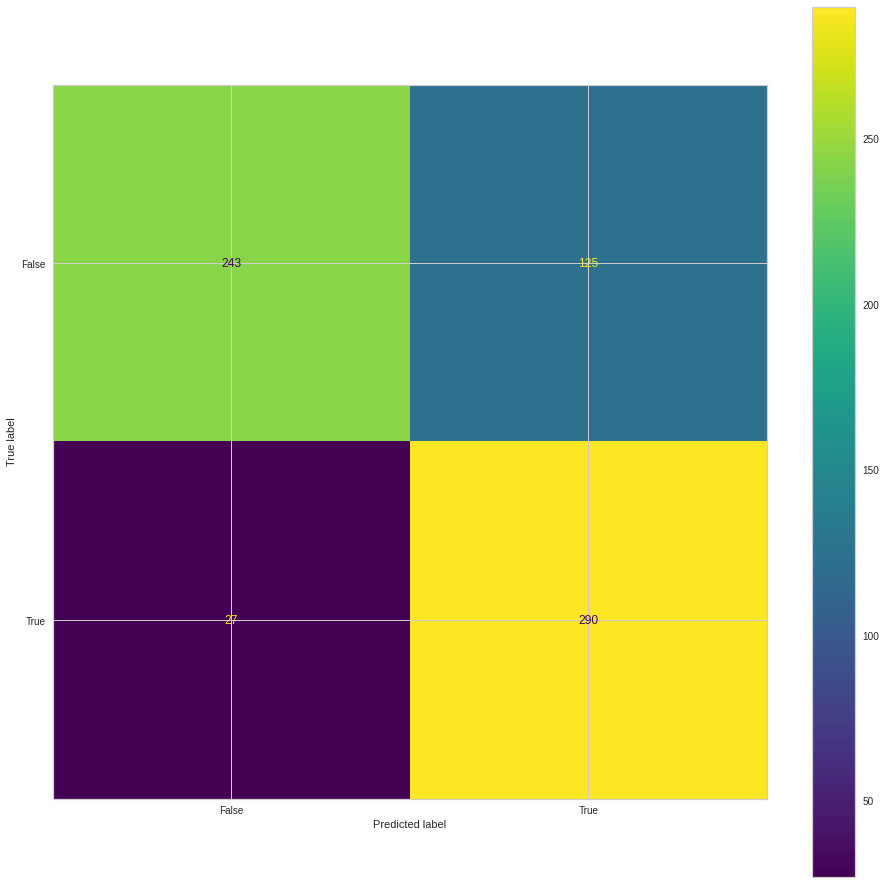

In [368]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=dt1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.7875762926896174


Text(0.5, 1.0, 'ROC Curve')

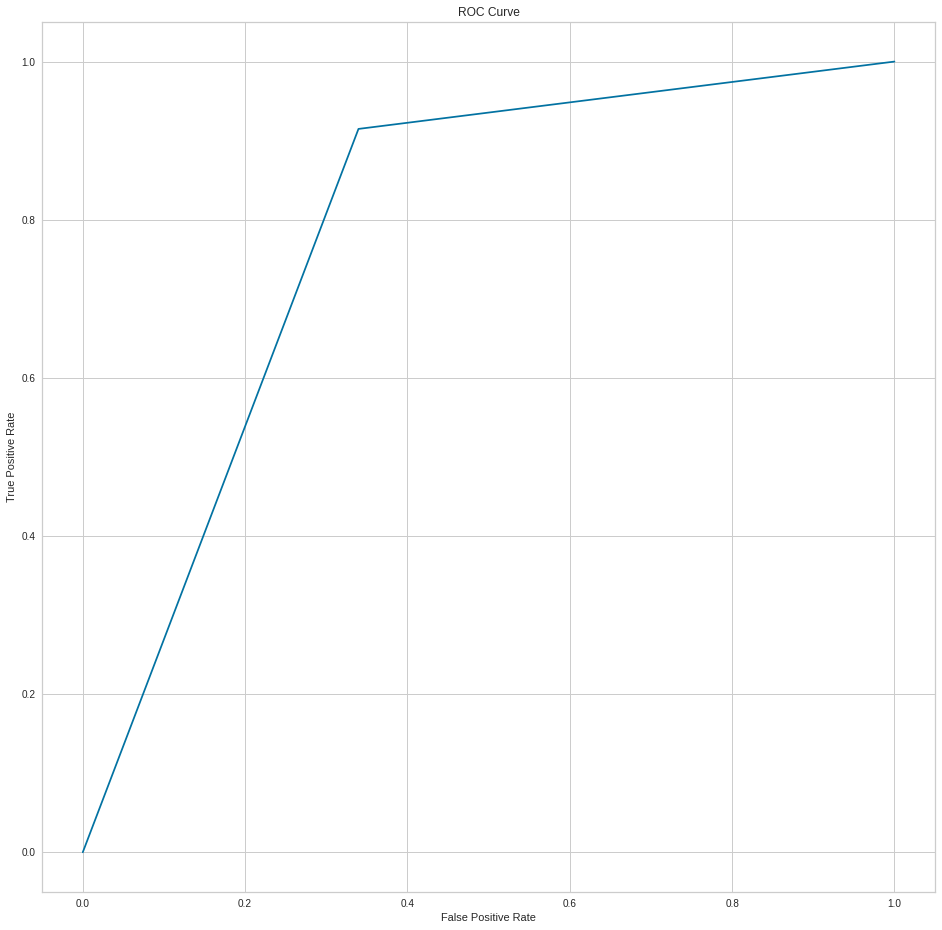

In [369]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

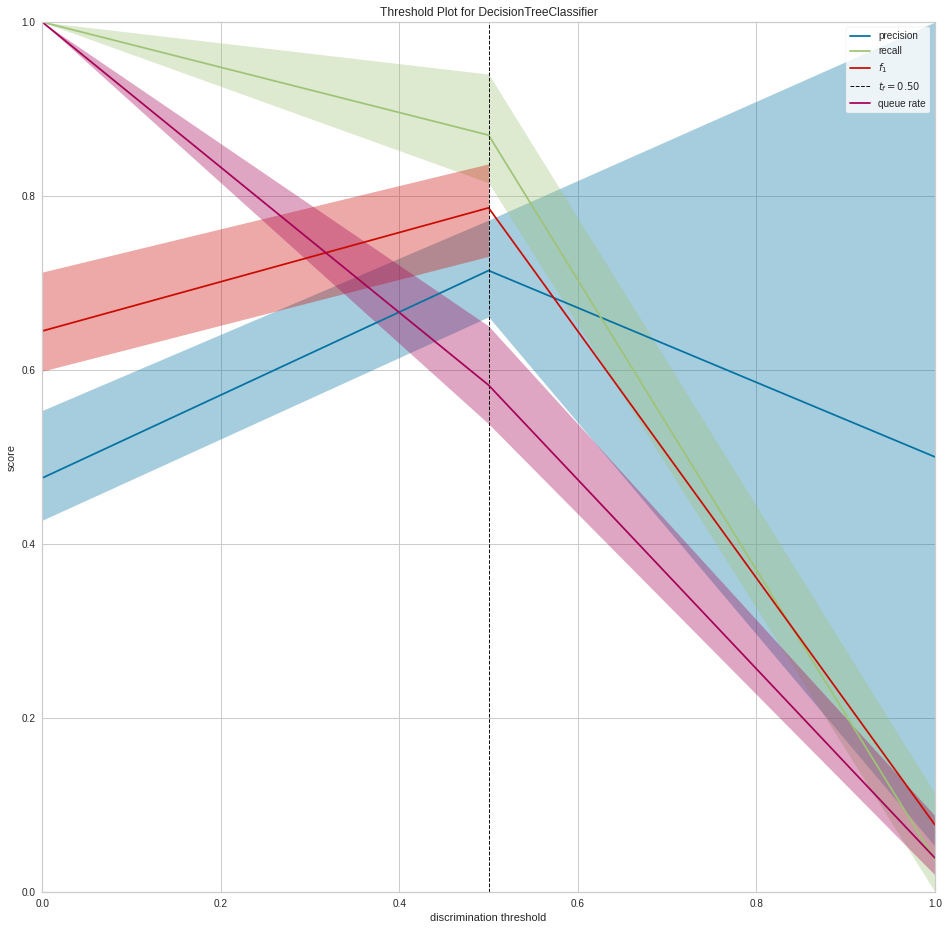

<Axes: title={'center': 'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [370]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(dt2)

visualizer.fit(train_c, y_train)        
visualizer.show()         

### **Random Forest**

In [371]:
rn2=RandomForestClassifier(bootstrap=True,max_depth=15,max_features=5, n_estimators= 100)
rn2.fit(train_c,y_train)
pred_y=rn2.predict(test_c)

In [372]:
#EVALUATION
rn_a2 = accuracy_score(y_test, prediction)*100
rn_p2 = precision_score(y_test, prediction)* 100
rn_r2 = recall_score(y_test, prediction)*100
rn_f12 = f1_score(y_test, prediction)*100

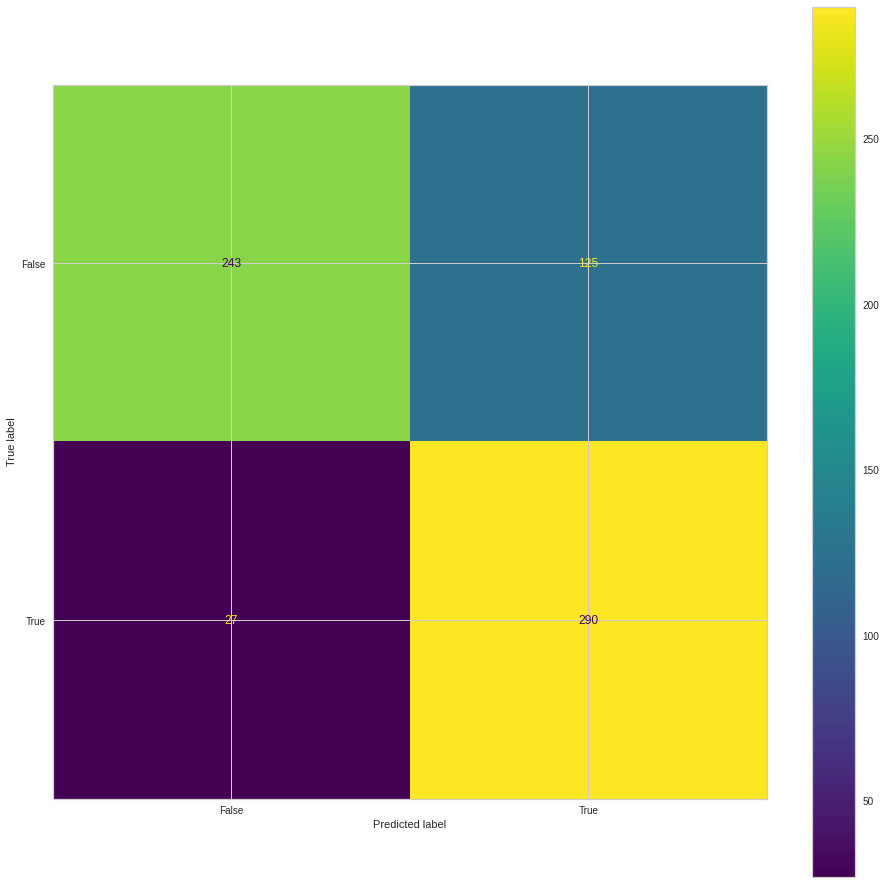

In [373]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=dt1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.7875762926896174


Text(0.5, 1.0, 'ROC Curve')

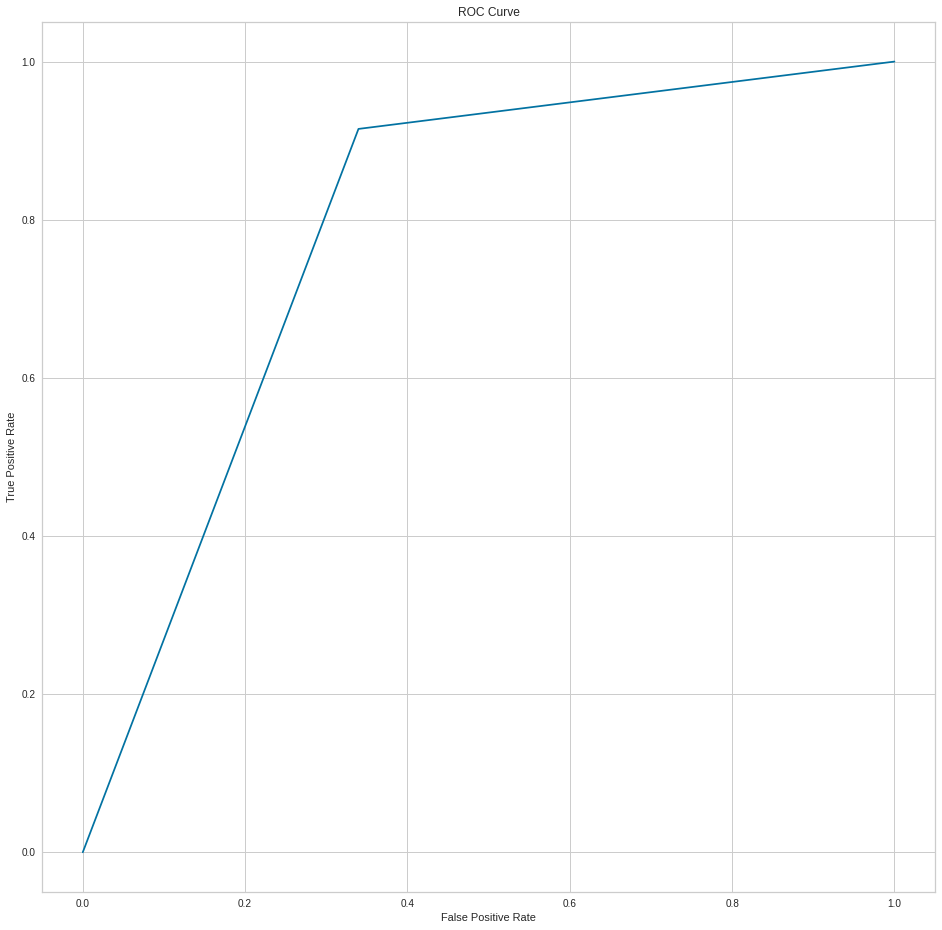

In [374]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

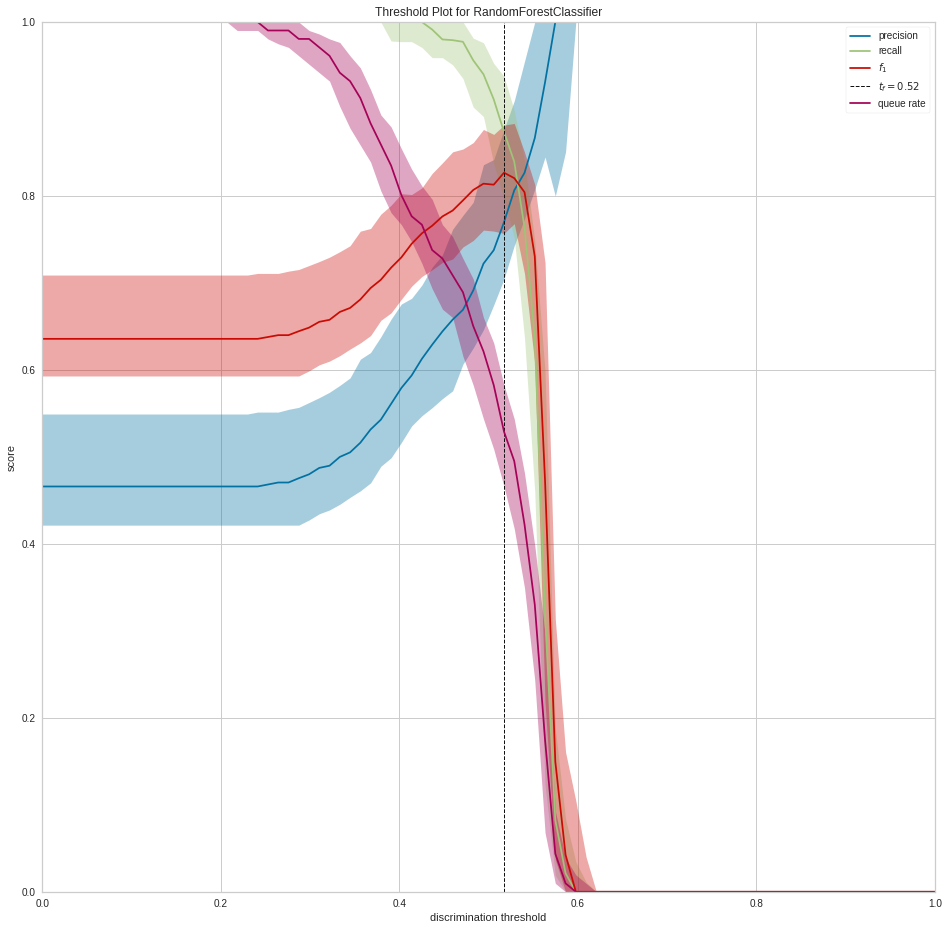

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [375]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(rn1)

visualizer.fit(train_c, y_train)        
visualizer.show()    

### COMPARING ACCURACY

In [376]:
model_accuracy={'MNB': [round(mnb_a1), round(mnb_a2)],
                'SVM': [round(svm_a1), round(svm_a2)],
                'LR': [round(lr_a1), round(lr_a2)],
                'DT': [round(dt_a1), round(dt_a2)],
                'RN': [round(rn_a1), round(rn_a2)]
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','LR','DT','RN'], index=['Count Vectorizer','Tfidf Vectorizer'])
ma

,MNB,SVM,LR,DT,RN
Count Vectorizer,80,80,82,78,78
Tfidf Vectorizer,79,82,81,78,78


### COMPARING PRECISION

In [377]:
model_precision={'MNB': [round(mnb_p1), round(mnb_p2)],
                'SVM': [round(svm_p1), round(svm_p2)],
                'LR': [round(lr_p1), round(lr_p2)],
                 'DT': [round(dt_p1), round(dt_p2)],
                'RN': [round(rn_p1), round(rn_p2)]
               }
mp = pd.DataFrame(model_precision, columns = ['MNB','SVM','LR','DT','RN'], index=['Count Vectorizer','Tfidf Vectorizer'])
mp

,MNB,SVM,LR,DT,RN
Count Vectorizer,79,74,75,71,71
Tfidf Vectorizer,81,77,79,70,70


### COMPARING RECALL

In [378]:
model_recall={'MNB': [round(mnb_r1), round(mnb_r2)],
                'SVM': [round(svm_r1), round(svm_r2)],
                'LR': [round(lr_r1), round(lr_r2)],
              'DT': [round(dt_r1), round(dt_r2)],
                'RN': [round(rn_r1), round(rn_r2)]
               }
mr = pd.DataFrame(model_recall, columns = ['MNB','SVM','LR','DT','RN'], index=['Count Vectorizer','Tfidf Vectorizer'])
mr

,MNB,SVM,LR,DT,RN
Count Vectorizer,77,89,91,87,87
Tfidf Vectorizer,72,86,81,91,91


### COMPARING F1 SCORE

In [379]:
model_f1={'MNB': [round(mnb_f11), round(mnb_f12)],
                'SVM': [round(svm_f11), round(svm_f12)],
                'LR': [round(lr_f11), round(lr_f12)],
                'DT': [round(dt_r1), round(dt_r2)],
                'RN': [round(rn_r1), round(rn_r2)]
               }
mf1 = pd.DataFrame(model_f1, columns = ['MNB','SVM','LR','DT','RN'], index=['Count Vectorizer','Tfidf Vectorizer'])
mf1

,MNB,SVM,LR,DT,RN
Count Vectorizer,78,81,83,87,87
Tfidf Vectorizer,76,81,80,91,91


# Deep Learning Models

**CNN Model**

In [401]:
def cnn():
    
    input_shape=(train_c.shape[1],)
    sequence = layers.Input(shape=input_shape)
    embeddings = layers.Embedding(len(count_vectorizer.vocabulary_), 128)(sequence)
    
    input= layers.Conv1D(128, 3, activation='relu')(embeddings)
    input= layers.MaxPool1D(3)(input)
    input= layers.Conv1D(64, 5, activation='relu')(input)
    input= layers.MaxPool1D(5)(input)
    input= layers.Conv1D(64, 5, activation='relu')(input)
    input= layers.GlobalMaxPool1D()(input)
    input= layers.Flatten()(input)
    input= layers.Dense(128, activation='relu')(input)
    
    pred = layers.Dense(1, activation='sigmoid')(input)
    
    model = models.Model(inputs=sequence, outputs=pred)
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model
    
model_cnn = cnn()

In [404]:
history = model_cnn.fit(
    train_c.toarray(), 
    y_train, 
    batch_size=32 ,
    epochs=10,verbose=1)

Epoch 1/10
33/33 [==============================] - 15s 448ms/step - loss: 0.5097 - accuracy: 0.7566
Epoch 2/10
33/33 [==============================] - 14s 416ms/step - loss: 0.4421 - accuracy: 0.8082
Epoch 3/10
33/33 [==============================] - 14s 423ms/step - loss: 0.4476 - accuracy: 0.8111
Epoch 4/10
33/33 [==============================] - 14s 422ms/step - loss: 0.4356 - accuracy: 0.8072
Epoch 5/10
33/33 [==============================] - 14s 423ms/step - loss: 0.4337 - accuracy: 0.8043
Epoch 6/10
33/33 [==============================] - 17s 521ms/step - loss: 0.4106 - accuracy: 0.8121
Epoch 7/10
33/33 [==============================] - 14s 425ms/step - loss: 0.3750 - accuracy: 0.8481
Epoch 8/10
33/33 [==============================] - 14s 429ms/step - loss: 0.3794 - accuracy: 0.8452
Epoch 9/10
33/33 [==============================] - 14s 427ms/step - loss: 0.3527 - accuracy: 0.8520
Epoch 10/10
33/33 [==============================] - 14s 429ms/step - loss: 0.3620 - accura

In [405]:
### Test Accuracy
model_cnn.evaluate(test_c.toarray(),y_test)

22/22 [==============================] - 2s 105ms/step - loss: 0.5829 - accuracy: 0.7460


[0.5829152464866638, 0.7459853887557983]

In [383]:
predictions_cnn = model_cnn.predict(test_c.toarray())
predictions_cnn = [True if x >= 0.5 else False for x in predictions_cnn]

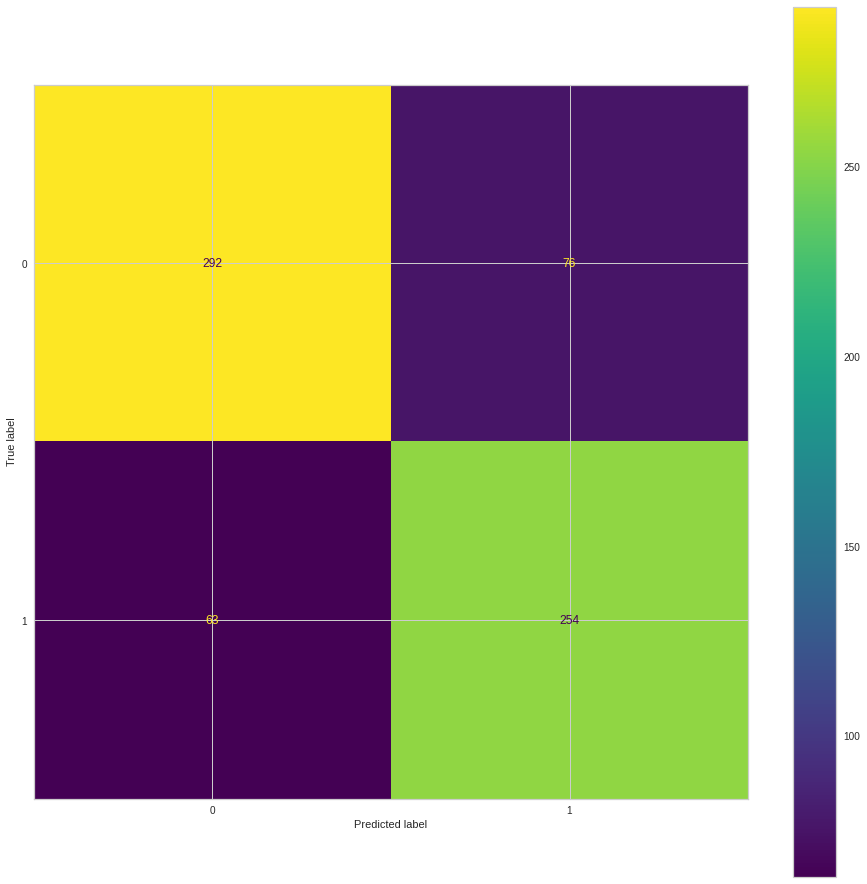

In [384]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, predictions_cnn)
display = ConfusionMatrixDisplay(confusion_matrix=cm) 
display.plot() 

The area under curve 0.797370045261281


Text(0, 0.5, 'True Positive Rate')

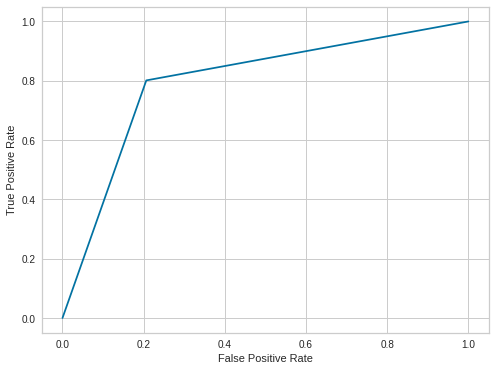

In [385]:
fpr, tpr, thresholds_roc = roc_curve(y_test,predictions_cnn)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

**ANN** **Model**

In [386]:
def ann():
  model = Sequential()
  model.add(Dense(units = 128 , activation = 'relu' , input_dim = train_c.shape[1]))
  model.add(Dense(units = 64 , activation = 'relu'))
  model.add(Dense(units = 32 , activation = 'relu'))
  model.add(Dense(units = 16 , activation = 'relu'))
  model.add(Dense(units = 1 , activation = 'sigmoid'))

  model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
  return model

In [406]:
model_ann = ann()
model_ann.fit(train_c.toarray(),y_train , epochs = 5,batch_size=32)

Epoch 1/5
33/33 [==============================] - 2s 8ms/step - loss: 0.6544 - accuracy: 0.6037
Epoch 2/5
33/33 [==============================] - 0s 8ms/step - loss: 0.3854 - accuracy: 0.8724
Epoch 3/5
33/33 [==============================] - 0s 10ms/step - loss: 0.1925 - accuracy: 0.9367
Epoch 4/5
33/33 [==============================] - 0s 8ms/step - loss: 0.1088 - accuracy: 0.9669
Epoch 5/5
33/33 [==============================] - 0s 11ms/step - loss: 0.0703 - accuracy: 0.9834


In [407]:
### Test Accuracy
model_ann.evaluate(test_c.toarray(),y_test)

22/22 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.8423


[0.5319725871086121, 0.8423357605934143]

In [390]:
predictions_ann = model_ann.predict(test_c.toarray())
predictions_ann = [True if x >= 0.5 else False for x in predictions_ann]

22/22 [==============================] - 0s 2ms/step


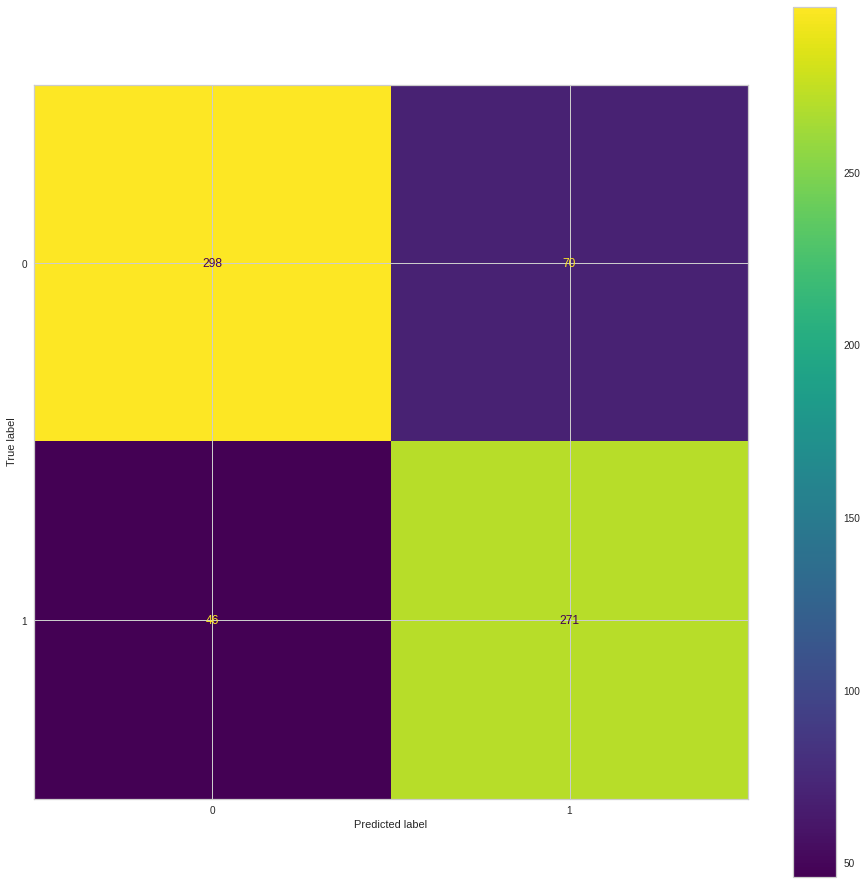

In [391]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, predictions_ann)
display = ConfusionMatrixDisplay(confusion_matrix=cm) 
display.plot() 

The area under curve 0.822778082567549


Text(0, 0.5, 'True Positive Rate')

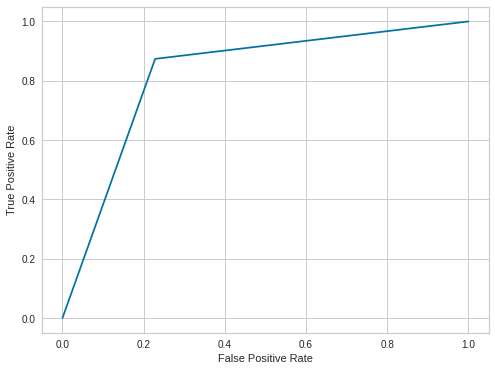

In [313]:
fpr, tpr, thresholds_roc = roc_curve(y_test,predictions_ann)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")